In [9]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Lecture 10 ##

## Apply

In [10]:
staff = Table().with_columns(
    'Employee', make_array('Jim', 'Dwight', 'Michael', 'Creed'),
    'Birth Year', make_array(1985, 1988, 1967, 1904)
)
staff

Employee,Birth Year
Jim,1985
Dwight,1988
Michael,1967
Creed,1904


In [11]:
def greeting(person):
    return 'Dunder Mifflin, this is ' + person

In [12]:
greeting('Pam')

'Dunder Mifflin, this is Pam'

In [13]:
greeting('Erin')

'Dunder Mifflin, this is Erin'

In [14]:
staff.apply(greeting, 'Employee')

array(['Dunder Mifflin, this is Jim', 'Dunder Mifflin, this is Dwight',
       'Dunder Mifflin, this is Michael', 'Dunder Mifflin, this is Creed'],
      dtype='<U31')

In [15]:
def name_and_age(name, year):
    age = 2021 - year
    return name + ' is ' + str(age)

In [16]:
2021 - 'Jim'

TypeError: unsupported operand type(s) for -: 'int' and 'str'

In [17]:
1985 + 'is' 

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [18]:
staff.apply(name_and_age, 'Employee', 'Birth Year')

array(['Jim is 36', 'Dwight is 33', 'Michael is 54', 'Creed is 117'],
      dtype='<U13')

## Prediction ##

In [19]:
galton = Table.read_table('data/galton.csv')
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,78.5,67,75.43,4,1,male,73.2
1,78.5,67,75.43,4,2,female,69.2
1,78.5,67,75.43,4,3,female,69
1,78.5,67,75.43,4,4,female,69
2,75.5,66.5,73.66,4,1,male,73.5
2,75.5,66.5,73.66,4,2,male,72.5
2,75.5,66.5,73.66,4,3,female,65.5
2,75.5,66.5,73.66,4,4,female,65.5
3,75,64,72.06,2,1,male,71
3,75,64,72.06,2,2,female,68


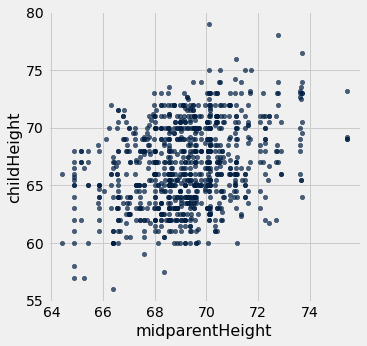

In [20]:
galton.scatter('midparentHeight', 'childHeight')
# compare these two quantitative variables

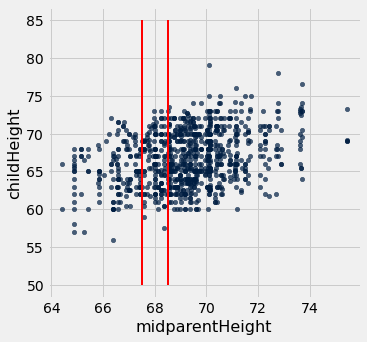

In [21]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2);

In [22]:
nearby = galton.where('midparentHeight', are.between(67.5, 68.5))
nearby_mean = nearby.column('childHeight').mean()
nearby_mean
# The average height of children from parents who were 67.5-68.5 inches tall, 
# was 66.24 inches.

66.24045801526718

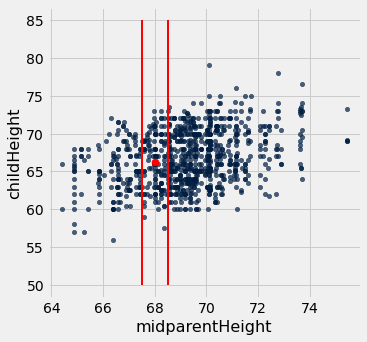

In [23]:
galton.scatter('midparentHeight', 'childHeight')
plots.plot([67.5, 67.5], [50, 85], color='red', lw=2)
plots.plot([68.5, 68.5], [50, 85], color='red', lw=2)
plots.scatter(68, nearby_mean, color='red', s=50);

In [24]:
def predict(h):
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    return nearby.column('childHeight').mean()

In [25]:
predict(68)
# The average height of children from midparentHeight of 67.5 - 68.5 inches tall,
# is 66.24 inches.

66.24045801526718

In [26]:
predict(70)

67.27285067873302

In [27]:
predict(73)

69.5

In [28]:
predicted_heights = galton.apply(predict, 'midparentHeight')
predicted_heights

array([70.1       , 70.1       , 70.1       , 70.1       , 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 68.5025    , 68.5025    ,
       68.5025    , 68.5025    , 68.5025    , 68.5025    , 68.5025    ,
       66.43149606, 66.43149606, 66.43149606, 66.43149606, 66.43149606,
       66.43149606, 70.41578947, 70.41578947, 70.41578947, 70.41578947,
       70.41578947, 70.41578947, 70.41578947, 69.18571429, 69.18571429,
       69.18571429, 69.18571429, 68.66052632, 67.63423913, 67.63423913,
       67.63423913, 67.63423913, 67.63423913, 67.63423913, 67.63423913,
       67.63423913, 67.37410714, 68.77428571, 68.77428571, 68.77428571,
       68.77428571, 68.59230769, 68.59230769, 68.59230769, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.07323944, 68.07323944,
       68.07323944, 68.07323944, 68.07323944, 68.05465116, 68.05465116,
       68.05465116, 68.05465116, 68.05465116, 68.05465116, 67.56276596,
       67.56276596, 67.56276596, 67.71678832, 70.41578947, 70.41

In [29]:
galton = galton.with_column('predictedHeight', predicted_heights)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight
1,78.5,67,75.43,4,1,male,73.2,70.1
1,78.5,67,75.43,4,2,female,69.2,70.1
1,78.5,67,75.43,4,3,female,69,70.1
1,78.5,67,75.43,4,4,female,69,70.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158
2,75.5,66.5,73.66,4,2,male,72.5,70.4158
2,75.5,66.5,73.66,4,3,female,65.5,70.4158
2,75.5,66.5,73.66,4,4,female,65.5,70.4158
3,75,64,72.06,2,1,male,71,68.5025
3,75,64,72.06,2,2,female,68,68.5025


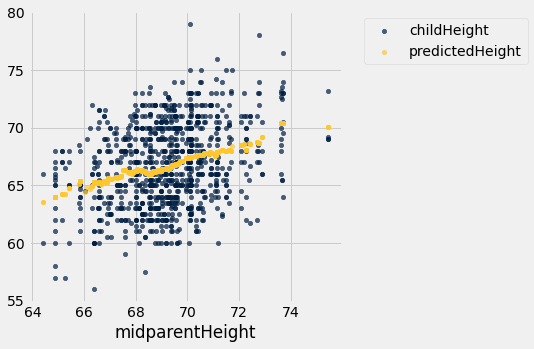

In [30]:
galton.select(
    'midparentHeight', 'childHeight', 'predictedHeight').scatter('midparentHeight')

## Prediction Accuracy ##

In [31]:
def difference(x, y):
    return x - y

In [32]:
pred_errs = galton.apply(difference, 'predictedHeight', 'childHeight')
pred_errs

array([-3.10000000e+00,  9.00000000e-01,  1.10000000e+00,  1.10000000e+00,
       -3.08421053e+00, -2.08421053e+00,  4.91578947e+00,  4.91578947e+00,
       -2.49750000e+00,  5.02500000e-01, -1.99750000e+00,  2.50000000e-03,
        1.50250000e+00,  4.00250000e+00,  5.50250000e+00, -5.56850394e+00,
       -2.56850394e+00, -1.56850394e+00, -6.85039370e-02,  3.93149606e+00,
        3.93149606e+00,  9.15789474e-01, -6.08421053e+00, -3.58421053e+00,
       -2.58421053e+00, -2.58421053e+00, -8.42105263e-02,  6.41578947e+00,
       -1.31428571e+00,  1.18571429e+00,  3.18571429e+00,  3.18571429e+00,
        3.16052632e+00, -6.36576087e+00, -2.36576087e+00, -3.65760870e-01,
        6.34239130e-01,  6.34239130e-01,  1.63423913e+00,  4.13423913e+00,
        4.63423913e+00,  2.37410714e+00, -2.22571429e+00,  6.77428571e+00,
        7.74285714e-01,  1.77428571e+00, -2.40769231e+00, -1.90769231e+00,
        1.89230769e+00, -3.92676056e+00, -2.42676056e+00, -2.12676056e+00,
       -2.12676056e+00, -

In [33]:
galton = galton.with_column('errors',pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9
1,78.5,67,75.43,4,3,female,69,70.1,1.1
1,78.5,67,75.43,4,4,female,69,70.1,1.1
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579
3,75,64,72.06,2,1,male,71,68.5025,-2.4975
3,75,64,72.06,2,2,female,68,68.5025,0.5025


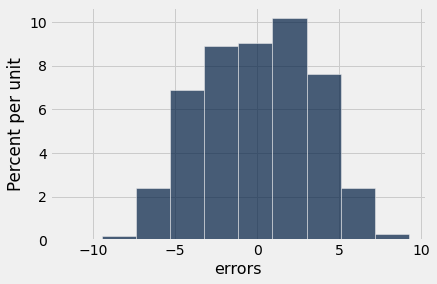

In [34]:
galton.hist('errors')

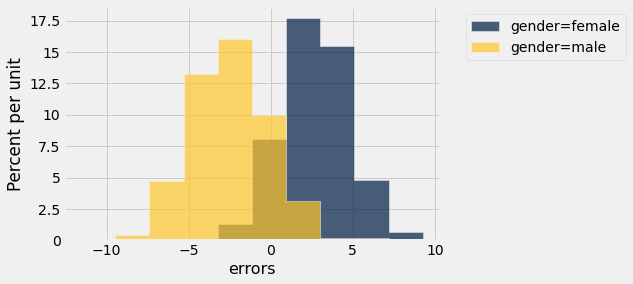

In [35]:
galton.hist('errors', group='gender')

# Discussion Question

In [36]:
def predict_smarter(h, g):
    '''predict the childs height using midparent height AND childs gender'''
    nearby = galton.where('midparentHeight', are.between(h - 1/2, h + 1/2))
    nearby_same_gender = nearby.where('gender', g)
    return nearby_same_gender.column('childHeight').mean()

In [37]:
predict_smarter(68, 'female')

62.909259259259265

In [38]:
predict_smarter(68, 'male')

68.57662337662337

In [40]:
smarter_predicted_heights = galton.apply(predict_smarter, 'midparentHeight', 'gender')
galton = galton.with_column('smartPredictedHeight', smarter_predicted_heights)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors,smartPredictedHeight
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1,73.2
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9,69.0667
1,78.5,67,75.43,4,3,female,69,70.1,1.1,69.0667
1,78.5,67,75.43,4,4,female,69,70.1,1.1,69.0667
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421,73.4889
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421,73.4889
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579,67.65
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579,67.65
3,75,64,72.06,2,1,male,71,68.5025,-2.4975,70.7955
3,75,64,72.06,2,2,female,68,68.5025,0.5025,65.7


In [42]:
smarter_pred_errs = galton.apply(difference, 'childHeight', 'smartPredictedHeight')
galton = galton.with_column('smartErrors', smarter_pred_errs)
galton

family,father,mother,midparentHeight,children,childNum,gender,childHeight,predictedHeight,errors,smartPredictedHeight,smartErrors
1,78.5,67,75.43,4,1,male,73.2,70.1,-3.1,73.2,0
1,78.5,67,75.43,4,2,female,69.2,70.1,0.9,69.0667,0.133333
1,78.5,67,75.43,4,3,female,69,70.1,1.1,69.0667,-0.0666667
1,78.5,67,75.43,4,4,female,69,70.1,1.1,69.0667,-0.0666667
2,75.5,66.5,73.66,4,1,male,73.5,70.4158,-3.08421,73.4889,0.0111111
2,75.5,66.5,73.66,4,2,male,72.5,70.4158,-2.08421,73.4889,-0.988889
2,75.5,66.5,73.66,4,3,female,65.5,70.4158,4.91579,67.65,-2.15
2,75.5,66.5,73.66,4,4,female,65.5,70.4158,4.91579,67.65,-2.15
3,75,64,72.06,2,1,male,71,68.5025,-2.4975,70.7955,0.204545
3,75,64,72.06,2,2,female,68,68.5025,0.5025,65.7,2.3


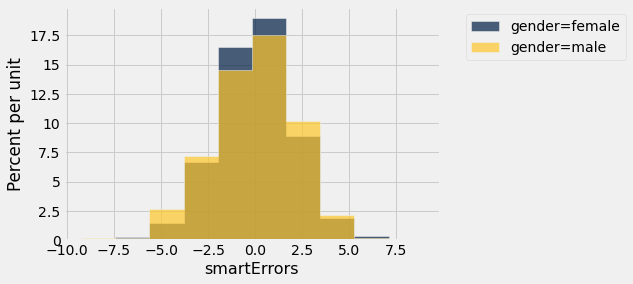

In [43]:
galton.hist('smartErrors', group='gender')

In [44]:
galton.group('gender')

gender,count
female,453
male,481


In [ ]:
# what is the range of female children's heights?

# what is the range of male children's height?

# how is the midparent height value computed? it's not exactly the average...



## Grouping by One Column ##

In [ ]:
cones = Table.read_table('data/cones.csv')

In [ ]:
cones

In [ ]:
cones.group('Flavor')

In [ ]:
cones.drop('Color').group('Flavor', np.average)

In [ ]:
cones.drop('Color').group('Flavor', min)

## Grouping By One Column: Class Data Survey ##

In [45]:
survey = Table.read_table('data/ds1-fall2021-classdata.csv')
survey
survey_relabeled = survey.relabeled('1. What is the area code of your phone number?', 'Area Code')
survey_relabeled.relabel('2. What is your major?', 'Major')

Area Code,Major,"3. What is your height in inches? (e.g., 5'6"" = 66 inches)",4. How often have you eaten out this week?,"5. Are you left-handed, right-handed or both?",6. How many siblings do you have?,"7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc)",8. How many hours of exercise do you get in a typical week?,9. How many pets do you have?,10. How many hours of television or media do you watch in a typical week?,11. Make up a very random 4-digit number:,12. Which award would you rather win:,13. Do you have a tattoo?,14. How many hours of sleep do you get in a typical day?,15. What is your favorite color?,16. Coffee or bagel?,17. Have you ever tie-dyed?,18. How many minutes does it usually take you to commute to school or work?,19. How do you get to work or school?,21. How many words a minute can you type?,22. How many people do you follow on Instagram?,23. How many social media accounts do you have?,24. What is your favorite social media platform?,25. How many hours of household chores do you do in a typical week?,26. Do you know how to write in cursive?
209,Chemistry,68,1,Right-handed,4,3,0,0,35,7263,Nobel Prize,Yes,6,Black,Coffee,Yes,20,Skateboard,70,0,3,Snapchat,7,Yes
210,Sociology,68,2,Right-handed,2,2,5,0,12,5555,Nobel Prize,No,8,Brown,Bagel,No,11,bike,80,360,3,twitter,7,No
203,Pre-Statistics and Data Science,66.5,2,Right-handed,3,4,4,0,3,9481,Nobel Prize,No,6,periwinkle,Coffee,Yes,7,bike,90,1100,3,VSCO,2,Yes
559,Pre-Biology,66,2,Right-handed,1,2,7,0,2,7878,Nobel Prize,No,8,Green,Coffee,Yes,10,bike,40,560,3,Instagram,2,Yes
773,Econ & Accounting,65,1,Right-handed,2,1,0,0,10,6785,Nobel Prize,No,9,light pink,Coffee,Yes,20,walk,40,140,3,WeChat,0.5,Yes
650,Economics,63,2,Right-handed,2,1,7,0,1,6789,Nobel Prize,No,8,pink,Coffee,Yes,10,bike,nan,1200,4,tik tok,1,No
619,Pre-Chem,65,1,Right-handed,1,2,4,1,4,8529,Nobel Prize,No,5,purple,Coffee,Yes,10,walk,50,372,5,Instagram,0,Yes
802,Applied Math,66,0,Right-handed,1,2,5,2,8,4511,Olympic Medal,Yes,8,Blue,Coffee,Yes,10,bike,nan,1040,6,instagram,4,Yes
949,Applied Mathematics,69,2,Right-handed,1,2,7,1,7,7634,Nobel Prize,No,8,Yellow,Bagel,Yes,15,walk,50,0,2,Snapchat,2,Yes
202,Undeclared,66.7,1,Right-handed,3,3,9,1,5,2526,Academy Award,No,7,purple,Coffee,Yes,10,bike,47,nan,nan,nan,1,Yes


In [50]:
survey_relabeled.labels

('Area Code',
 'Major',
 '3. What is your height in inches? (e.g., 5\'6" = 66 inches)',
 '4. How often have you eaten out this week?',
 '5. Are you left-handed, right-handed or both?',
 '6. How many siblings do you have?',
 '7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc)',
 '8. How many hours of exercise do you get in a typical week?',
 '9. How many pets do you have?',
 '10. How many hours of television or media do you watch in a typical week?',
 '11. Make up a very random 4-digit number:',
 '12. Which award would you rather win:',
 '13. Do you have a tattoo?',
 '14. How many hours of sleep do you get in a typical day?',
 '15. What is your favorite color?',
 '16. Coffee or bagel?',
 '17. Have you ever tie-dyed?',
 '18. How many minutes does it usually take you to commute to school or work?',
 '19. How do you get to work or school?',
 '21. How many words a minute can you type?',
 '22. How many people do you follow on Instagram?',
 '23. How many social media

In [51]:
# try relabeling the rest of the column headers
survey_relabeled.relabel('5. Are you left-handed, right-handed or both?', 'Handedness')

survey_relabeled.relabel('3. What is your height in inches? (e.g., 5\'6" = 66 inches)', 'Height')


Area Code,Major,Height,4. How often have you eaten out this week?,Handedness,6. How many siblings do you have?,"7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc)",8. How many hours of exercise do you get in a typical week?,9. How many pets do you have?,10. How many hours of television or media do you watch in a typical week?,11. Make up a very random 4-digit number:,12. Which award would you rather win:,13. Do you have a tattoo?,14. How many hours of sleep do you get in a typical day?,15. What is your favorite color?,16. Coffee or bagel?,17. Have you ever tie-dyed?,18. How many minutes does it usually take you to commute to school or work?,19. How do you get to work or school?,21. How many words a minute can you type?,22. How many people do you follow on Instagram?,23. How many social media accounts do you have?,24. What is your favorite social media platform?,25. How many hours of household chores do you do in a typical week?,26. Do you know how to write in cursive?
209,Chemistry,68,1,Right-handed,4,3,0,0,35,7263,Nobel Prize,Yes,6,Black,Coffee,Yes,20,Skateboard,70,0,3,Snapchat,7,Yes
210,Sociology,68,2,Right-handed,2,2,5,0,12,5555,Nobel Prize,No,8,Brown,Bagel,No,11,bike,80,360,3,twitter,7,No
203,Pre-Statistics and Data Science,66.5,2,Right-handed,3,4,4,0,3,9481,Nobel Prize,No,6,periwinkle,Coffee,Yes,7,bike,90,1100,3,VSCO,2,Yes
559,Pre-Biology,66,2,Right-handed,1,2,7,0,2,7878,Nobel Prize,No,8,Green,Coffee,Yes,10,bike,40,560,3,Instagram,2,Yes
773,Econ & Accounting,65,1,Right-handed,2,1,0,0,10,6785,Nobel Prize,No,9,light pink,Coffee,Yes,20,walk,40,140,3,WeChat,0.5,Yes
650,Economics,63,2,Right-handed,2,1,7,0,1,6789,Nobel Prize,No,8,pink,Coffee,Yes,10,bike,nan,1200,4,tik tok,1,No
619,Pre-Chem,65,1,Right-handed,1,2,4,1,4,8529,Nobel Prize,No,5,purple,Coffee,Yes,10,walk,50,372,5,Instagram,0,Yes
802,Applied Math,66,0,Right-handed,1,2,5,2,8,4511,Olympic Medal,Yes,8,Blue,Coffee,Yes,10,bike,nan,1040,6,instagram,4,Yes
949,Applied Mathematics,69,2,Right-handed,1,2,7,1,7,7634,Nobel Prize,No,8,Yellow,Bagel,Yes,15,walk,50,0,2,Snapchat,2,Yes
202,Undeclared,66.7,1,Right-handed,3,3,9,1,5,2526,Academy Award,No,7,purple,Coffee,Yes,10,bike,47,nan,nan,nan,1,Yes


In [59]:
survey_relabeled.group('Major', np.average)

Major,Area Code average,Height average,4. How often have you eaten out this week? average,Handedness average,6. How many siblings do you have? average,"7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc) average",8. How many hours of exercise do you get in a typical week? average,9. How many pets do you have? average,10. How many hours of television or media do you watch in a typical week? average,11. Make up a very random 4-digit number: average,12. Which award would you rather win: average,13. Do you have a tattoo? average,14. How many hours of sleep do you get in a typical day? average,15. What is your favorite color? average,16. Coffee or bagel? average,17. Have you ever tie-dyed? average,18. How many minutes does it usually take you to commute to school or work? average,19. How do you get to work or school? average,21. How many words a minute can you type? average,22. How many people do you follow on Instagram? average,23. How many social media accounts do you have? average,24. What is your favorite social media platform? average,25. How many hours of household chores do you do in a typical week? average,26. Do you know how to write in cursive? average
Actuarial Science,916,72,4,,1,2,12,1,10,1234,,,8,,,,5,,85,500,2,,5,
Applied Math,802,66,0,,1,2,5,2,8,4511,,,8,,,,10,,nan,1040,6,,4,
Applied Mathematics,949,69,2,,1,2,7,1,7,7634,,,8,,,,15,,50,0,2,,2,
Applied Mathematics,408,67,2,,2,1,4,1,9,6785,,,8,,,,5,,50,1436,6,,2,
Biology,619,60,4,,2,1,3,3,1,3488,,,5,,,,10,,60,466,3,,1,
Biomedical Engineering,820,60,3,,4,3,8,8,4,2042,,,8,,,,20,,40,380,6,,10,
Chemistry,209,68,1,,4,3,0,0,35,7263,,,6,,,,20,,70,0,3,,7,
Communication,303,69,4,,1,1,10,4,5,5551,,,7,,,,8,,66,598,2,,4,
Computer Science,857,61.5,2,,1.5,1.5,4.5,2,12.5,1537.5,,,6.75,,,,15,,108,299.5,5,,4,
Data Science,408,72,8,,1,1,10,2,20,9854,,,5,,,,10,,90,1450,4,,5,


In [60]:
by_areacode = survey_relabeled.group('Area Code', np.average)
by_areacode

Area Code,Major average,Height average,4. How often have you eaten out this week? average,Handedness average,6. How many siblings do you have? average,"7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc) average",8. How many hours of exercise do you get in a typical week? average,9. How many pets do you have? average,10. How many hours of television or media do you watch in a typical week? average,11. Make up a very random 4-digit number: average,12. Which award would you rather win: average,13. Do you have a tattoo? average,14. How many hours of sleep do you get in a typical day? average,15. What is your favorite color? average,16. Coffee or bagel? average,17. Have you ever tie-dyed? average,18. How many minutes does it usually take you to commute to school or work? average,19. How do you get to work or school? average,21. How many words a minute can you type? average,22. How many people do you follow on Instagram? average,23. How many social media accounts do you have? average,24. What is your favorite social media platform? average,25. How many hours of household chores do you do in a typical week? average,26. Do you know how to write in cursive? average
202,,66.7,1,,3,3,9,1,5,2526,,,7,,,,10,,47,nan,nan,,1,
203,,66.5,2,,3,4,4,0,3,9481,,,6,,,,7,,90,1100,3,,2,
209,,69.8,2.6,,1.4,1.4,6,0.8,17,4144.6,,,7,,,,11,,45.4,240.2,3.2,,2.4,
210,,68,2,,2,2,5,0,12,5555,,,8,,,,11,,80,360,3,,7,
213,,63,0,,2,1,0,0,30,4389,,,7,,,,25,,20,463,3,,3,
224,,65.5,1.5,,0.5,1.5,3.5,0.5,4.5,6455,,,7.5,,,,10,,nan,1069.5,8.5,,2.5,
303,,69,4,,1,1,10,4,5,5551,,,7,,,,8,,66,598,2,,4,
305,,72,2,,3,1,10,1,7,6969,,,6,,,,30,,57,633,4,,3,
323,,65,0,,1.5,2,2,3,6.5,5254,,,6,,,,16.5,,38,714,3.5,,1.5,
330,,64,0,,1,1,7,3,4,8394,,,7,,,,7,,92,nan,8,,2,


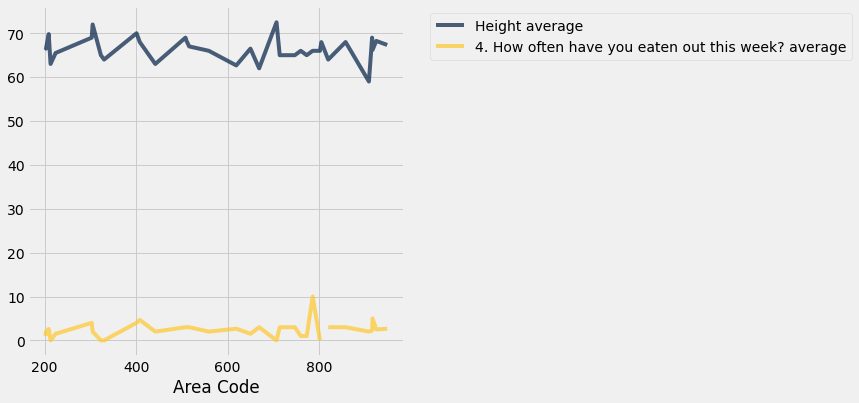

In [61]:
by_areacode.select(0,2,3).plot('Area Code') # Drop the 'Years average' column

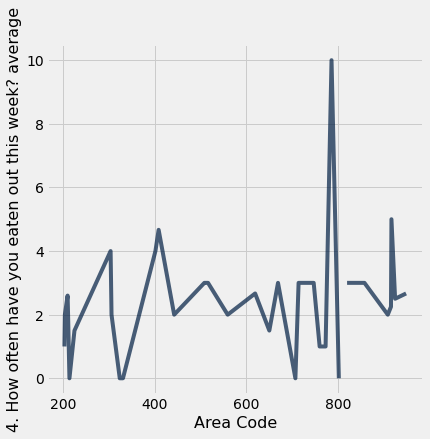

In [62]:
by_areacode.select(0,3).plot('Area Code')

## Lists

In [ ]:
[1, 5, 'hello', 5.0]

In [ ]:
[1, 5, 'hello', 5.0, make_array(1,2,3)]

## Grouping by Two Columns ##

In [65]:
survey_relabeled.select(['Handedness','Height']).show()

Handedness,Height
Right-handed,68
Right-handed,68
Right-handed,66.5
Right-handed,66
Right-handed,65
Right-handed,63
Right-handed,65
Right-handed,66
Right-handed,69
Right-handed,66.7


## Pivot Tables

In [66]:
survey_relabeled.group(make_array('Handedness','Height'))

Handedness,Height,count
Both left- and right-handed,63,1
Both left- and right-handed,67,1
Both left- and right-handed,69,1
Both left- and right-handed,70,1
Left-handed,63,2
Left-handed,64,1
Left-handed,65,2
Left-handed,74,1
Right-handed,59,1
Right-handed,60,2


In [68]:
survey_relabeled.pivot('Handedness','Major')

Major,Both left- and right-handed,Left-handed,Right-handed
Actuarial Science,0,0,1
Applied Math,0,0,1
Applied Mathematics,0,0,1
Applied Mathematics,0,0,1
Biology,0,0,1
Biomedical Engineering,0,0,1
Chemistry,0,0,1
Communication,1,0,0
Computer Science,0,1,1
Data Science,0,0,1


In [70]:
survey_relabeled.pivot('Handedness','Major', values='Height', collect=np.average)

Major,Both left- and right-handed,Left-handed,Right-handed
Actuarial Science,0,0,72
Applied Math,0,0,66
Applied Mathematics,0,0,69
Applied Mathematics,0,0,67
Biology,0,0,60
Biomedical Engineering,0,0,60
Chemistry,0,0,68
Communication,69,0,0
Computer Science,0,64,59
Data Science,0,0,72


In [72]:
survey_relabeled.group('Handedness', np.average)

Handedness,Area Code average,Major average,Height average,4. How often have you eaten out this week? average,6. How many siblings do you have? average,"7. What is your birth order? (1 = oldest/only child, 2 = second oldest, etc) average",8. How many hours of exercise do you get in a typical week? average,9. How many pets do you have? average,10. How many hours of television or media do you watch in a typical week? average,11. Make up a very random 4-digit number: average,12. Which award would you rather win: average,13. Do you have a tattoo? average,14. How many hours of sleep do you get in a typical day? average,15. What is your favorite color? average,16. Coffee or bagel? average,17. Have you ever tie-dyed? average,18. How many minutes does it usually take you to commute to school or work? average,19. How do you get to work or school? average,21. How many words a minute can you type? average,22. How many people do you follow on Instagram? average,23. How many social media accounts do you have? average,24. What is your favorite social media platform? average,25. How many hours of household chores do you do in a typical week? average,26. Do you know how to write in cursive? average
Both left- and right-handed,412.5,,67.25,1.75,1,1,5.75,1.5,15.25,3715,,,7,,,,12,,50.5,542,3.25,,2.5,
Left-handed,487,,65.6667,2,1.5,1.16667,5.66667,0.833333,13,5211.67,,,6.66667,,,,12,,46.8333,339,3.66667,,3.83333,
Right-handed,nan,,67.3297,nan,1.43548,1.67742,5.70161,1.06452,10.1452,4789.1,,,8.12903,,,,12.9194,,nan,nan,nan,,nan,
